In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
years = range(2016, 2021)
weeks = range(1, 18)
files = []

for year in years:
    weeks = [pd.read_csv('./scraped_data/' + str(year) +'/week_' + str(i) + '.csv', 
                        parse_dates=True) for i in range(1, 18)]
    file = pd.concat(weeks)
    file['season'] = year
    files.append(file)

games = pd.concat(files)
games.reset_index(drop=True, inplace=True)
games['game_date'] = pd.DatetimeIndex(games['game_date'])

In [3]:
games.head()

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
0,2016-09-08,Denver Broncos,Carolina Panthers,21,20,20:40:00,Sports Authority Field at Mile High,00:03:12,21,21,...,Panthers (deferred),outdoors,grass,"76,843","85 degrees, relative humidity 12%, wind 10 mph...",Carolina Panthers,-3,40.5,over,2016
1,2016-09-11,Baltimore Ravens,Buffalo Bills,13,7,13:04:00,M&T Bank Stadium,00:02:54,18,11,...,Bills (deferred),outdoors,grass,"71,104","84 degrees, relative humidity 44%, wind 8 mph,...",Baltimore Ravens,-3,44.5,under,2016
2,2016-09-11,Jacksonville Jaguars,Green Bay Packers,23,27,13:04:00,EverBank Field,00:03:10,20,18,...,Packers (deferred),outdoors,grass,"63,179","90 degrees, relative humidity 55%, wind 3 mph,...",Green Bay Packers,-3.5,47.0,over,2016
3,2016-09-11,Atlanta Falcons,Tampa Bay Buccaneers,24,31,13:05:00,Georgia Dome,00:03:02,19,20,...,Buccaneers (deferred),dome,fieldturf,"69,382",NaN,Atlanta Falcons,-2.5,46.5,over,2016
4,2016-09-11,Tennessee Titans,Minnesota Vikings,16,25,13:05:00,Nissan Stadium,00:02:57,19,15,...,Titans,outdoors,grass,"63,816","76 degrees, relative humidity 47%, wind 5 mph",Minnesota Vikings,-2.5,40.0,over,2016


In [4]:
games.tail()

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
1275,2021-03-01,Los Angeles Rams,Arizona Cardinals,18,7,16:25:00,SoFi Stadium,00:02:52,21,15,...,Rams (deferred),dome,matrixturf,0,NaN,Los Angeles Rams,-1,42.0,under,2020
1276,2021-03-01,Indianapolis Colts,Jacksonville Jaguars,28,14,16:25:00,Lucas Oil Stadium,00:02:56,23,18,...,Colts (deferred),retractable roof (closed),fieldturf,"9,976",NaN,Indianapolis Colts,-15.5,47.5,under,2020
1277,2021-03-01,Houston Texans,Tennessee Titans,38,41,16:25:00,NRG Stadium,00:03:13,26,28,...,Texans,retractable roof (closed),grass,"12,504",NaN,Tennessee Titans,-7,55.5,over,2020
1278,2021-03-01,Kansas City Chiefs,Los Angeles Chargers,21,38,16:25:00,Arrowhead Stadium,00:02:56,18,29,...,Chargers (deferred),outdoors,astroturf,"13,240","35 degrees, relative humidity 88%, wind 6 mph,...",Los Angeles Chargers,-7,43.0,over,2020
1279,2021-03-01,Philadelphia Eagles,Washington Football Team,14,20,20:20:00,Lincoln Financial Field,00:03:02,16,16,...,Football Team (deferred),outdoors,grass,0,"38 degrees, relative humidity 92%, wind 10 mph...",Washington Football Team,-6.5,44.0,under,2020


In [219]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   game_date                    1280 non-null   datetime64[ns]
 1   home_team                    1280 non-null   object        
 2   away_team                    1280 non-null   object        
 3   home_score                   1280 non-null   int64         
 4   away_score                   1280 non-null   int64         
 5   game_time                    1280 non-null   object        
 6   stadium                      1280 non-null   object        
 7   duration                     1280 non-null   object        
 8   home_first_downs             1280 non-null   int64         
 9   away_first_downs             1280 non-null   int64         
 10  home_num_rushes              1280 non-null   int64         
 11  home_rush_yards              1280 non-null 

In [5]:
games.shape

(1280, 64)

In [221]:
games.dtypes

game_date             datetime64[ns]
home_team                     object
away_team                     object
home_score                     int64
away_score                     int64
                           ...      
fav_team                      object
handicap                      object
points_line                  float64
points_line_result            object
season                         int64
Length: 64, dtype: object

In [6]:
games.columns

Index(['game_date', 'home_team', 'away_team', 'home_score', 'away_score',
       'game_time', 'stadium', 'duration', 'home_first_downs',
       'away_first_downs', 'home_num_rushes', 'home_rush_yards',
       'home_rush_tds', 'away_num_rushes', 'away_rush_yards', 'away_rush_tds',
       'home_pass_comp', 'home_pass_att', 'home_pass_yards', 'home_pass_tds',
       'home_pass_ints', 'away_pass_comp', 'away_pass_att', 'away_pass_yards',
       'away_pass_tds', 'away_pass_ints', 'home_sacks_allowed',
       'home_sacks_yards_allowed', 'away_sacks_allowed',
       'away_sacks_yards_allowed', 'home_net_pass_yards',
       'away_net_pass_yards', 'home_total_yards', 'away_total_yards',
       'home_fumbles', 'home_fumbles_lost', 'away_fumbles',
       'away_fumbles_lost', 'home_turnovers', 'away_turnovers',
       'home_num_penallity', 'home_penallity_yards', 'away_num_penallity',
       'away_penallity_yards', 'home_third_downs',
       'home_third_downs_converted', 'away_third_downs',
      

In [7]:
games.dtypes.value_counts()

int64             47
object            15
float64            1
datetime64[ns]     1
dtype: int64

# preparing the data

In [8]:
# check for duplicated rows

games.duplicated().value_counts()

False    1280
dtype: int64

In [9]:
# check missing stadium values

games[games['stadium'].isnull()]

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season


In [10]:
games[games['home_team'] == 'San Francisco 49ers']

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
15,2016-09-12,San Francisco 49ers,Los Angeles Rams,28,0,22:20:00,Levi's Stadium,00:03:05,28,10,...,Rams,outdoors,grass,"70,178","66 degrees, relative humidity 56%, wind 17 mph...",Los Angeles Rams,-2.5,43.0,under,2016
59,2016-10-02,San Francisco 49ers,Dallas Cowboys,17,24,16:25:00,Levi's Stadium,00:02:59,14,26,...,49ers (deferred),outdoors,grass,"70,178","68 degrees, relative humidity 60%, wind 10 mph...",Dallas Cowboys,-1,44.5,under,2016
63,2016-10-06,San Francisco 49ers,Arizona Cardinals,21,33,20:27:00,Levi's Stadium,00:03:06,25,17,...,Cardinals,outdoors,grass,"70,178","75 degrees, relative humidity 34%, wind 16 mph...",Arizona Cardinals,-3.5,42.5,over,2016
103,2016-10-23,San Francisco 49ers,Tampa Bay Buccaneers,17,34,16:05:00,Levi's Stadium,00:03:14,20,27,...,Buccaneers (deferred),outdoors,grass,"70,178","68 degrees, relative humidity 49%, wind 5 mph,...",San Francisco 49ers,-1,45.0,over,2016
128,2016-11-06,San Francisco 49ers,New Orleans Saints,23,41,16:05:00,Levi's Stadium,00:03:13,19,29,...,49ers (deferred),outdoors,grass,"70,178","70 degrees, no wind",New Orleans Saints,-5,53.0,over,2016
157,2016-11-20,San Francisco 49ers,New England Patriots,17,30,16:25:00,Levi's Stadium,00:03:06,20,28,...,Patriots (deferred),outdoors,grass,"70,178","64 degrees, wind 6 mph",New England Patriots,-10.5,51.5,under,2016
202,2016-12-11,San Francisco 49ers,New York Jets,17,23,16:05:00,Levi's Stadium,00:03:21,17,24,...,49ers (deferred),outdoors,grass,"70,178","54 degrees, wind 8 mph",San Francisco 49ers,-3,42.5,under,2016
252,2017-01-01,San Francisco 49ers,Seattle Seahawks,23,25,16:25:00,Levi's Stadium,00:03:03,14,18,...,Seahawks (deferred),outdoors,grass,"70,178","54 degrees, wind 5 mph",Seattle Seahawks,-11.5,45.0,over,2016
267,2017-09-10,San Francisco 49ers,Carolina Panthers,3,23,16:25:00,Levi's Stadium,00:02:55,13,20,...,49ers (deferred),outdoors,grass,"70,178","87 degrees, wind 8 mph",Carolina Panthers,-4.5,45.5,under,2017
287,2017-09-21,San Francisco 49ers,Los Angeles Rams,39,41,20:25:00,Levi's Stadium,00:03:24,25,26,...,Rams (deferred),outdoors,grass,"70,178","68 degrees, wind 13 mph",Los Angeles Rams,-3.0,40.5,over,2017


In [11]:
# check for roof missing values

games[games['roof'].isnull()]

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season


In [12]:
games[games['home_team'] == 'San Francisco 49ers']

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
15,2016-09-12,San Francisco 49ers,Los Angeles Rams,28,0,22:20:00,Levi's Stadium,00:03:05,28,10,...,Rams,outdoors,grass,"70,178","66 degrees, relative humidity 56%, wind 17 mph...",Los Angeles Rams,-2.5,43.0,under,2016
59,2016-10-02,San Francisco 49ers,Dallas Cowboys,17,24,16:25:00,Levi's Stadium,00:02:59,14,26,...,49ers (deferred),outdoors,grass,"70,178","68 degrees, relative humidity 60%, wind 10 mph...",Dallas Cowboys,-1,44.5,under,2016
63,2016-10-06,San Francisco 49ers,Arizona Cardinals,21,33,20:27:00,Levi's Stadium,00:03:06,25,17,...,Cardinals,outdoors,grass,"70,178","75 degrees, relative humidity 34%, wind 16 mph...",Arizona Cardinals,-3.5,42.5,over,2016
103,2016-10-23,San Francisco 49ers,Tampa Bay Buccaneers,17,34,16:05:00,Levi's Stadium,00:03:14,20,27,...,Buccaneers (deferred),outdoors,grass,"70,178","68 degrees, relative humidity 49%, wind 5 mph,...",San Francisco 49ers,-1,45.0,over,2016
128,2016-11-06,San Francisco 49ers,New Orleans Saints,23,41,16:05:00,Levi's Stadium,00:03:13,19,29,...,49ers (deferred),outdoors,grass,"70,178","70 degrees, no wind",New Orleans Saints,-5,53.0,over,2016
157,2016-11-20,San Francisco 49ers,New England Patriots,17,30,16:25:00,Levi's Stadium,00:03:06,20,28,...,Patriots (deferred),outdoors,grass,"70,178","64 degrees, wind 6 mph",New England Patriots,-10.5,51.5,under,2016
202,2016-12-11,San Francisco 49ers,New York Jets,17,23,16:05:00,Levi's Stadium,00:03:21,17,24,...,49ers (deferred),outdoors,grass,"70,178","54 degrees, wind 8 mph",San Francisco 49ers,-3,42.5,under,2016
252,2017-01-01,San Francisco 49ers,Seattle Seahawks,23,25,16:25:00,Levi's Stadium,00:03:03,14,18,...,Seahawks (deferred),outdoors,grass,"70,178","54 degrees, wind 5 mph",Seattle Seahawks,-11.5,45.0,over,2016
267,2017-09-10,San Francisco 49ers,Carolina Panthers,3,23,16:25:00,Levi's Stadium,00:02:55,13,20,...,49ers (deferred),outdoors,grass,"70,178","87 degrees, wind 8 mph",Carolina Panthers,-4.5,45.5,under,2017
287,2017-09-21,San Francisco 49ers,Los Angeles Rams,39,41,20:25:00,Levi's Stadium,00:03:24,25,26,...,Rams (deferred),outdoors,grass,"70,178","68 degrees, wind 13 mph",Los Angeles Rams,-3.0,40.5,over,2017


In [13]:
# check weather missing values

games[games['weather'].notnull()]

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
0,2016-09-08,Denver Broncos,Carolina Panthers,21,20,20:40:00,Sports Authority Field at Mile High,00:03:12,21,21,...,Panthers (deferred),outdoors,grass,"76,843","85 degrees, relative humidity 12%, wind 10 mph...",Carolina Panthers,-3,40.5,over,2016
1,2016-09-11,Baltimore Ravens,Buffalo Bills,13,7,13:04:00,M&T Bank Stadium,00:02:54,18,11,...,Bills (deferred),outdoors,grass,"71,104","84 degrees, relative humidity 44%, wind 8 mph,...",Baltimore Ravens,-3,44.5,under,2016
2,2016-09-11,Jacksonville Jaguars,Green Bay Packers,23,27,13:04:00,EverBank Field,00:03:10,20,18,...,Packers (deferred),outdoors,grass,"63,179","90 degrees, relative humidity 55%, wind 3 mph,...",Green Bay Packers,-3.5,47.0,over,2016
4,2016-09-11,Tennessee Titans,Minnesota Vikings,16,25,13:05:00,Nissan Stadium,00:02:57,19,15,...,Titans,outdoors,grass,"63,816","76 degrees, relative humidity 47%, wind 5 mph",Minnesota Vikings,-2.5,40.0,over,2016
5,2016-09-11,Philadelphia Eagles,Cleveland Browns,29,10,13:05:00,Lincoln Financial Field,00:02:59,23,14,...,Browns (deferred),outdoors,grass,"69,596","85 degrees, relative humidity 42%, wind 14 mph...",Philadelphia Eagles,-4,41.5,under,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2021-03-01,Chicago Bears,Green Bay Packers,16,35,16:25:00,Soldier Field,00:02:54,21,17,...,Packers (deferred),outdoors,grass,0,"32 degrees, relative humidity 85%, wind 7 mph,...",Green Bay Packers,-4.5,48.0,over,2020
1272,2021-03-01,Denver Broncos,Las Vegas Raiders,31,32,16:25:00,Empower Field at Mile High,00:03:29,24,22,...,Broncos (deferred),outdoors,grass,0,"53 degrees, relative humidity 19%, wind 10 mph...",Las Vegas Raiders,-2.5,50.5,over,2020
1273,2021-03-01,Carolina Panthers,New Orleans Saints,7,33,16:25:00,Bank of America Stadium,00:02:52,17,20,...,Saints (deferred),outdoors,grass,"1,500","57 degrees, relative humidity 80%, wind 2 mph,...",New Orleans Saints,-6,47.0,under,2020
1278,2021-03-01,Kansas City Chiefs,Los Angeles Chargers,21,38,16:25:00,Arrowhead Stadium,00:02:56,18,29,...,Chargers (deferred),outdoors,astroturf,"13,240","35 degrees, relative humidity 88%, wind 6 mph,...",Los Angeles Chargers,-7,43.0,over,2020


In [15]:
games['roof'].value_counts()

outdoors                     933
retractable roof (closed)    179
dome                         152
retractable roof (open)       16
Name: roof, dtype: int64

In [16]:
len(games[games['weather'].notnull()])

918

In [17]:
games[((games['roof'] == 'outdoors') | (games['roof'] == 'retractable roof (open)')) & (games['weather'].isnull())]

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
11,2016-09-11,Indianapolis Colts,Detroit Lions,35,39,16:27:00,Lucas Oil Stadium,00:03:25,25,28,...,Lions (deferred),retractable roof (open),fieldturf,"65,566",NaN,Indianapolis Colts,-2.5,51.0,over,2016
68,2016-10-09,Indianapolis Colts,Chicago Bears,29,23,13:02:00,Lucas Oil Stadium,00:03:08,20,25,...,Colts (deferred),retractable roof (open),fieldturf,"66,622",NaN,Indianapolis Colts,-4,47.5,over,2016
101,2016-10-23,New York Jets,Baltimore Ravens,24,16,13:04:00,MetLife Stadium,00:02:54,16,11,...,Jets (deferred),outdoors,fieldturf,"78,160",NaN,New York Jets,-2.5,40.0,push,2016
260,2017-09-10,Houston Texans,Jacksonville Jaguars,7,29,13:00:00,NRG Stadium,00:03:06,23,19,...,Texans (deferred),retractable roof (open),astroturf,"71,710",NaN,Houston Texans,-5.5,38.0,under,2017
285,2017-09-17,Atlanta Falcons,Green Bay Packers,34,23,20:30:00,Mercedes-Benz Stadium,00:03:10,19,24,...,Packers (deferred),retractable roof (open),fieldturf,"70,826",NaN,Atlanta Falcons,-3,55.0,over,2017
309,2017-10-01,Houston Texans,Tennessee Titans,57,14,13:00:00,NRG Stadium,00:02:56,33,9,...,Titans,retractable roof (open),astroturf,"71,804",NaN,Tennessee Titans,-2.5,43.0,over,2017
388,2017-11-09,Arizona Cardinals,Seattle Seahawks,16,22,20:25:00,University of Phoenix Stadium,00:03:28,24,14,...,Cardinals (deferred),retractable roof (open),grass,"64,639",NaN,Seattle Seahawks,-6,40.0,under,2017
425,2017-11-26,Indianapolis Colts,Tennessee Titans,16,20,13:00:00,Lucas Oil Stadium,00:02:55,15,19,...,Titans (deferred),retractable roof (open),fieldturf,"62,207",NaN,Tennessee Titans,-3,46.5,under,2017
460,2017-12-10,Jacksonville Jaguars,Seattle Seahawks,30,24,16:25:00,EverBank Field,00:03:21,20,17,...,Seahawks (deferred),outdoors,grass,"64,431",NaN,Jacksonville Jaguars,-3.0,41.0,over,2017
536,2018-09-16,Atlanta Falcons,Carolina Panthers,31,24,13:00:00,Mercedes-Benz Stadium,00:03:08,23,27,...,Falcons (deferred),retractable roof (open),fieldturf,"72,528",NaN,Atlanta Falcons,-5.5,44.0,over,2018


In [18]:
len(games[(games['roof'] != 'outdoors') & (games['weather'].isnull())]) == \
    (games['roof'].value_counts()['dome'] + games['roof'].value_counts()['retractable roof (closed)'])

False

In [19]:
games['home_score'].quantile([0.25, 0.75])[0.25]

17.0

(array([ 32.,  60., 138., 156., 225., 285., 164.,  98.,  79.,  28.,  10.,
          5.]),
 array([ 0.  ,  4.75,  9.5 , 14.25, 19.  , 23.75, 28.5 , 33.25, 38.  ,
        42.75, 47.5 , 52.25, 57.  ]),
 <a list of 12 Patch objects>)

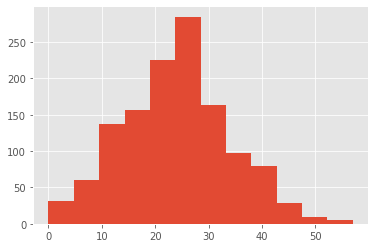

In [20]:
plt.hist(games['home_score'], range=[games['home_score'].min(), games['home_score'].max()], bins=12)

In [21]:
games['home_score'].median()

24.0

In [22]:
games['home_score'].describe()

count    1280.000000
mean       23.804688
std        10.033531
min         0.000000
25%        17.000000
50%        24.000000
75%        30.000000
max        57.000000
Name: home_score, dtype: float64

In [23]:
games[games['home_score'] < 10]

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
26,2016-09-18,Los Angeles Rams,Seattle Seahawks,9,3,16:08:00,Los Angeles Memorial Coliseum,00:03:04,17,17,...,Seahawks (deferred),outdoors,grass,"91,046","88 degrees, relative humidity 39%, wind 3 mph,...",Seattle Seahawks,-5.5,38.0,under,2016
53,2016-10-02,New England Patriots,Buffalo Bills,0,16,13:02:00,Gillette Stadium,00:02:50,13,24,...,Bills (deferred),outdoors,fieldturf,"66,829","56 degrees, relative humidity 91%, wind 7 mph,...",New England Patriots,-3.5,41.0,under,2016
57,2016-10-02,Tampa Bay Buccaneers,Denver Broncos,7,27,16:05:00,Raymond James Stadium,00:04:32,15,22,...,Broncos (deferred),outdoors,grass,"60,375","88 degrees, relative humidity 63%, wind 7 mph",Denver Broncos,-3.5,43.0,under,2016
105,2016-10-23,Arizona Cardinals,Seattle Seahawks,6,6,20:30:00,University of Phoenix Stadium,00:03:41,23,11,...,Seahawks (deferred),retractable roof (closed),grass,"65,089",NaN,Arizona Cardinals,-2.5,43.0,under,2016
136,2016-11-13,New York Jets,Los Angeles Rams,6,9,13:00:00,MetLife Stadium,00:02:54,17,16,...,Jets (deferred),outdoors,fieldturf,"78,160","62 degrees, wind 7 mph",Los Angeles Rams,-1,39.0,under,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,2020-12-20,New York Giants,Cleveland Browns,6,20,20:20:00,MetLife Stadium,00:02:47,14,24,...,Browns (deferred),outdoors,fieldturf,0,"36 degrees, relative humidity 82%, no wind",Cleveland Browns,-6,45.0,under,2020
1249,2020-12-26,Detroit Lions,Tampa Bay Buccaneers,7,47,13:00:00,Ford Field,00:03:02,12,30,...,Buccaneers,dome,fieldturf,0,NaN,Tampa Bay Buccaneers,-9.5,54.0,push,2020
1263,2020-12-28,New England Patriots,Buffalo Bills,9,38,20:15:00,Gillette Stadium,00:02:51,11,31,...,Bills (deferred),outdoors,grass,0,"41 degrees, relative humidity 90%, wind 4 mph",Buffalo Bills,-7,47.5,under,2020
1268,2021-03-01,Cincinnati Bengals,Baltimore Ravens,3,38,13:00:00,Paul Brown Stadium,00:02:55,10,24,...,Bengals (deferred),outdoors,grass,"10,499","39 degrees, relative humidity 79%, wind 10 mph...",Baltimore Ravens,-13.5,46.0,under,2020


In [25]:
a = games.groupby(games['season'])['home_score'].sum()
a

season
2016    6159
2017    5878
2018    6258
2019    5822
2020    6353
Name: home_score, dtype: int64

In [26]:
b = games.groupby(games['season'])['away_score'].sum()
b

season
2016    5502
2017    5242
2018    5694
2019    5858
2020    6339
Name: away_score, dtype: int64

In [27]:
points_per_season = pd.concat([a, b], axis=1)

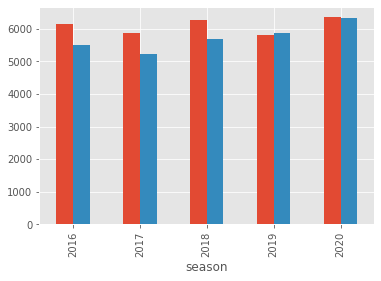

In [28]:
points_per_season.plot.bar(legend=False)

In [29]:
pass_attempts_home = games.groupby('season')['home_pass_att'].sum()
pass_attempts_home

season
2016    8994
2017    8799
2018    8851
2019    9004
2020    8922
Name: home_pass_att, dtype: int64

In [30]:
pass_attempts_away = games.groupby('season')['away_pass_att'].sum()
pass_attempts_away

season
2016    9301
2017    8689
2018    8820
2019    8849
2020    9096
Name: away_pass_att, dtype: int64

In [31]:
pass_attempts = pd.concat([pass_attempts_home, pass_attempts_away], axis=1)
pass_attempts

,home_pass_att,away_pass_att
season,,
2016,8994,9301
2017,8799,8689
2018,8851,8820
2019,9004,8849
2020,8922,9096


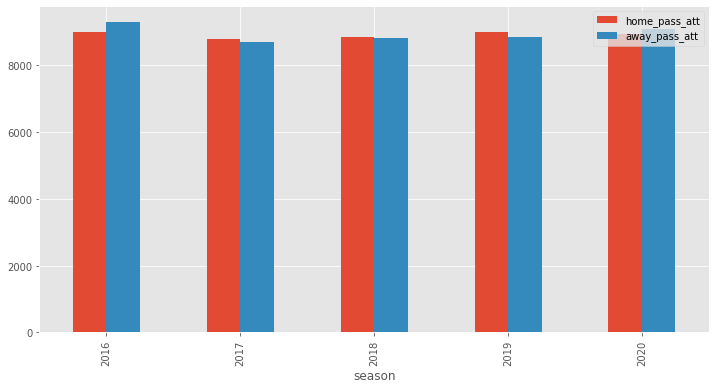

In [32]:
pass_attempts[['home_pass_att', 'away_pass_att']].plot(kind='bar', figsize=(12, 6))

In [35]:
rush_attempts_home = games.groupby('season')['home_num_rushes'].sum()
rush_attempts_home

season
2016    6934
2017    7075
2018    6794
2019    6622
2020    6766
Name: home_num_rushes, dtype: int64

In [36]:
rush_attempts_away = games.groupby('season')['away_num_rushes'].sum()
rush_attempts_away

season
2016    6387
2017    6680
2018    6478
2019    6765
2020    7026
Name: away_num_rushes, dtype: int64

# highest scoring team - 2020

In [40]:
season_2020 = games[games['season'] == 2020]
season_2020.head()

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
1024,2020-10-09,Kansas City Chiefs,Houston Texans,34,20,20:20:00,Arrowhead Stadium,00:02:53,28,21,...,Chiefs (deferred),outdoors,astroturf,"15,895","56 degrees, relative humidity 95%, wind 7 mph",Kansas City Chiefs,-9.5,53.5,over,2020
1025,2020-09-13,Jacksonville Jaguars,Indianapolis Colts,27,20,13:00:00,TIAA Bank Stadium,00:02:53,17,27,...,Jaguars (deferred),outdoors,grass,"14,100","80 degrees, relative humidity 85%, wind 3 mph",Indianapolis Colts,-7,44.0,over,2020
1026,2020-09-13,Carolina Panthers,Las Vegas Raiders,30,34,13:00:00,Bank of America Stadium,00:03:00,22,23,...,Panthers (deferred),outdoors,grass,0,"81 degrees, relative humidity 59%, wind 5 mph",Las Vegas Raiders,-3,48.0,over,2020
1027,2020-09-13,Detroit Lions,Chicago Bears,23,27,13:00:00,Ford Field,00:03:16,25,26,...,Lions (deferred),dome,fieldturf,0,NaN,Detroit Lions,-2.5,42.5,over,2020
1028,2020-09-13,Buffalo Bills,New York Jets,27,17,13:00:00,Bills Stadium,00:03:10,31,15,...,Bills (deferred),outdoors,astroturf,0,"67 degrees, relative humidity 93%, wind 15 mph",Buffalo Bills,-6.5,39.5,over,2020


In [55]:
# highest home team points

high_score_home = season_2020.groupby('home_team')['home_score'].sum().sort_values(ascending=False)
high_score_home

home_team
Tennessee Titans            263
Buffalo Bills               256
Green Bay Packers           253
New Orleans Saints          253
Dallas Cowboys              238
Seattle Seahawks            237
Baltimore Ravens            234
Minnesota Vikings           231
Pittsburgh Steelers         230
Tampa Bay Buccaneers        228
Arizona Cardinals           226
Las Vegas Raiders           224
Indianapolis Colts          220
Kansas City Chiefs          220
Atlanta Falcons             209
Houston Texans              205
Cleveland Browns            205
Miami Dolphins              200
Detroit Lions               194
Los Angeles Chargers        174
Carolina Panthers           171
Philadelphia Eagles         170
Los Angeles Rams            166
Chicago Bears               166
Cincinnati Bengals          165
San Francisco 49ers         160
New England Patriots        155
Washington Football Team    147
Denver Broncos              144
New York Jets               142
Jacksonville Jaguars        13

In [53]:
# highest away team points

high_score_away = season_2020.groupby('away_team')['away_score'].sum().sort_values(ascending=False)
high_score_away

away_team
Tampa Bay Buccaneers        264
Green Bay Packers           256
Kansas City Chiefs          253
Buffalo Bills               245
Baltimore Ravens            234
Indianapolis Colts          231
New Orleans Saints          229
Tennessee Titans            228
Seattle Seahawks            222
San Francisco 49ers         216
Los Angeles Chargers        210
Las Vegas Raiders           210
Chicago Bears               206
Los Angeles Rams            206
Miami Dolphins              204
Cleveland Browns            203
Minnesota Vikings           199
Washington Football Team    188
Atlanta Falcons             187
Pittsburgh Steelers         186
Arizona Cardinals           184
Detroit Lions               183
Houston Texans              179
Denver Broncos              179
Carolina Panthers           179
New England Patriots        171
Jacksonville Jaguars        170
Philadelphia Eagles         164
Dallas Cowboys              157
New York Giants             149
Cincinnati Bengals          14

In [56]:
# highest score home + away

(high_score_home + high_score_away).sort_values(ascending=False)

Green Bay Packers           509
Buffalo Bills               501
Tampa Bay Buccaneers        492
Tennessee Titans            491
New Orleans Saints          482
Kansas City Chiefs          473
Baltimore Ravens            468
Seattle Seahawks            459
Indianapolis Colts          451
Las Vegas Raiders           434
Minnesota Vikings           430
Pittsburgh Steelers         416
Arizona Cardinals           410
Cleveland Browns            408
Miami Dolphins              404
Atlanta Falcons             396
Dallas Cowboys              395
Houston Texans              384
Los Angeles Chargers        384
Detroit Lions               377
San Francisco 49ers         376
Los Angeles Rams            372
Chicago Bears               372
Carolina Panthers           350
Washington Football Team    335
Philadelphia Eagles         334
New England Patriots        326
Denver Broncos              323
Cincinnati Bengals          311
Jacksonville Jaguars        306
New York Giants             280
New York

In [57]:
games.head()

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
0,2016-09-08,Denver Broncos,Carolina Panthers,21,20,20:40:00,Sports Authority Field at Mile High,00:03:12,21,21,...,Panthers (deferred),outdoors,grass,"76,843","85 degrees, relative humidity 12%, wind 10 mph...",Carolina Panthers,-3,40.5,over,2016
1,2016-09-11,Baltimore Ravens,Buffalo Bills,13,7,13:04:00,M&T Bank Stadium,00:02:54,18,11,...,Bills (deferred),outdoors,grass,"71,104","84 degrees, relative humidity 44%, wind 8 mph,...",Baltimore Ravens,-3,44.5,under,2016
2,2016-09-11,Jacksonville Jaguars,Green Bay Packers,23,27,13:04:00,EverBank Field,00:03:10,20,18,...,Packers (deferred),outdoors,grass,"63,179","90 degrees, relative humidity 55%, wind 3 mph,...",Green Bay Packers,-3.5,47.0,over,2016
3,2016-09-11,Atlanta Falcons,Tampa Bay Buccaneers,24,31,13:05:00,Georgia Dome,00:03:02,19,20,...,Buccaneers (deferred),dome,fieldturf,"69,382",NaN,Atlanta Falcons,-2.5,46.5,over,2016
4,2016-09-11,Tennessee Titans,Minnesota Vikings,16,25,13:05:00,Nissan Stadium,00:02:57,19,15,...,Titans,outdoors,grass,"63,816","76 degrees, relative humidity 47%, wind 5 mph",Minnesota Vikings,-2.5,40.0,over,2016


# over/under stats

In [58]:
games['points_line_result'].value_counts()

under    643
over     626
push      11
Name: points_line_result, dtype: int64

In [73]:
# points line with roof enclosed

roof_enclosed_games = games[(games['roof'] == 'retractable roof (closed)') | (games['roof'] == 'dome')]
roof_enclosed_games.head()

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
3,2016-09-11,Atlanta Falcons,Tampa Bay Buccaneers,24,31,13:05:00,Georgia Dome,00:03:02,19,20,...,Buccaneers (deferred),dome,fieldturf,"69,382",NaN,Atlanta Falcons,-2.5,46.5,over,2016
8,2016-09-11,New Orleans Saints,Oakland Raiders,34,35,13:05:00,Mercedes-Benz Superdome,00:04:23,27,25,...,Raiders (deferred),dome,sportturf,"73,028",NaN,New Orleans Saints,-2.5,50.0,over,2016
9,2016-09-11,Houston Texans,Chicago Bears,23,14,13:05:00,NRG Stadium,00:02:58,17,14,...,Bears (deferred),retractable roof (closed),fieldturf,"71,933",NaN,Houston Texans,-5.5,43.0,under,2016
12,2016-09-11,Dallas Cowboys,New York Giants,19,20,16:27:00,AT&T Stadium,00:02:59,24,18,...,Cowboys,retractable roof (closed),matrixturf,"92,867",NaN,Dallas Cowboys,-1,47.5,under,2016
13,2016-09-11,Arizona Cardinals,New England Patriots,21,23,20:30:00,University of Phoenix Stadium,00:03:03,21,19,...,Cardinals,retractable roof (closed),grass,"64,864",NaN,Arizona Cardinals,-9,44.5,under,2016


In [68]:
roof_enclosed_games['points_line'].describe()

count    331.000000
mean      47.314199
std        4.412216
min       36.500000
25%       44.000000
50%       47.000000
75%       50.000000
max       61.500000
Name: points_line, dtype: float64

In [71]:
roof_enclosed_games['points_line_result'].value_counts()

over     166
under    163
push       2
Name: points_line_result, dtype: int64

In [100]:
# total points roof enclosed

(roof_enclosed_games['home_score'].sum() + roof_enclosed_games['away_score'].sum()) / len(roof_enclosed_games)

48.65558912386707

In [66]:
# points line outside

outdoor_games = games[(games['roof'] == 'outdoors') | (games['roof'] == 'retractable roof (open)')]
outdoor_games.head()

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
0,2016-09-08,Denver Broncos,Carolina Panthers,21,20,20:40:00,Sports Authority Field at Mile High,00:03:12,21,21,...,Panthers (deferred),outdoors,grass,"76,843","85 degrees, relative humidity 12%, wind 10 mph...",Carolina Panthers,-3,40.5,over,2016
1,2016-09-11,Baltimore Ravens,Buffalo Bills,13,7,13:04:00,M&T Bank Stadium,00:02:54,18,11,...,Bills (deferred),outdoors,grass,"71,104","84 degrees, relative humidity 44%, wind 8 mph,...",Baltimore Ravens,-3,44.5,under,2016
2,2016-09-11,Jacksonville Jaguars,Green Bay Packers,23,27,13:04:00,EverBank Field,00:03:10,20,18,...,Packers (deferred),outdoors,grass,"63,179","90 degrees, relative humidity 55%, wind 3 mph,...",Green Bay Packers,-3.5,47.0,over,2016
4,2016-09-11,Tennessee Titans,Minnesota Vikings,16,25,13:05:00,Nissan Stadium,00:02:57,19,15,...,Titans,outdoors,grass,"63,816","76 degrees, relative humidity 47%, wind 5 mph",Minnesota Vikings,-2.5,40.0,over,2016
5,2016-09-11,Philadelphia Eagles,Cleveland Browns,29,10,13:05:00,Lincoln Financial Field,00:02:59,23,14,...,Browns (deferred),outdoors,grass,"69,596","85 degrees, relative humidity 42%, wind 14 mph...",Philadelphia Eagles,-4,41.5,under,2016


In [67]:
outdoor_games['points_line'].describe()

count    949.000000
mean      45.368282
std        4.264592
min       35.000000
25%       42.500000
50%       45.000000
75%       48.000000
max       63.500000
Name: points_line, dtype: float64

In [74]:
outdoor_games['points_line_result'].value_counts()

under    480
over     460
push       9
Name: points_line_result, dtype: int64

In [101]:
# total points outdoors

(outdoor_games['home_score'].sum() + outdoor_games['away_score'].sum()) / len(outdoor_games)

45.310853530031615

In [ ]:
# analysis of proportions
               # over?
#           yes     no      total 
# roof      166     163     329
# no roof   460     480     940  
# total     626     643     1269 

In [87]:
n1 = (roof_enclosed_games['points_line_result'].value_counts()['over'] + \
            roof_enclosed_games['points_line_result'].value_counts()['under'])

pi1 = roof_enclosed_games['points_line_result'].value_counts()['over'] / n1
pi1

0.5045592705167173

In [88]:
n2 = (outdoor_games['points_line_result'].value_counts()['over'] + \
            outdoor_games['points_line_result'].value_counts()['under'])
pi2 = outdoor_games['points_line_result'].value_counts()['over'] / n2   
pi2

0.48936170212765956

In [91]:
from math import sqrt

se = sqrt(((pi1*(1 - pi1)) / n1) + ((pi2*(1 - pi2)) / n2))
se

0.032025806575872874

In [ ]:
# approx 95% CI for the difference in proportions of under/over

In [94]:
pi = pi1 - pi2

(pi - (1.96 * se), pi + (1.96 * se))

(-0.04757301249965305, 0.07796814927776861)

In [95]:
# 0 is contained in the interval, so we conclude that playing inside an enclosed area increases the 
# probability of a game finishing over the poins total

# comparing covid scoring to normal years (no fans)

In [102]:
season_2020 = games[games['season'] == 2020]
season_2020.head()

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
1024,2020-10-09,Kansas City Chiefs,Houston Texans,34,20,20:20:00,Arrowhead Stadium,00:02:53,28,21,...,Chiefs (deferred),outdoors,astroturf,"15,895","56 degrees, relative humidity 95%, wind 7 mph",Kansas City Chiefs,-9.5,53.5,over,2020
1025,2020-09-13,Jacksonville Jaguars,Indianapolis Colts,27,20,13:00:00,TIAA Bank Stadium,00:02:53,17,27,...,Jaguars (deferred),outdoors,grass,"14,100","80 degrees, relative humidity 85%, wind 3 mph",Indianapolis Colts,-7,44.0,over,2020
1026,2020-09-13,Carolina Panthers,Las Vegas Raiders,30,34,13:00:00,Bank of America Stadium,00:03:00,22,23,...,Panthers (deferred),outdoors,grass,0,"81 degrees, relative humidity 59%, wind 5 mph",Las Vegas Raiders,-3,48.0,over,2020
1027,2020-09-13,Detroit Lions,Chicago Bears,23,27,13:00:00,Ford Field,00:03:16,25,26,...,Lions (deferred),dome,fieldturf,0,NaN,Detroit Lions,-2.5,42.5,over,2020
1028,2020-09-13,Buffalo Bills,New York Jets,27,17,13:00:00,Bills Stadium,00:03:10,31,15,...,Bills (deferred),outdoors,astroturf,0,"67 degrees, relative humidity 93%, wind 15 mph",Buffalo Bills,-6.5,39.5,over,2020


In [103]:
season_2019 = games[games['season'] == 2019]
season_2019.head()

,game_date,home_team,away_team,home_score,away_score,game_time,stadium,duration,home_first_downs,away_first_downs,...,won_toss,roof,surface,attendance,weather,fav_team,handicap,points_line,points_line_result,season
768,2019-09-05,Chicago Bears,Green Bay Packers,3,10,20:20:00,Soldier Field,00:03:07,16,13,...,Bears (deferred),outdoors,grass,"62,435","65 degrees, relative humidity 69%, wind 10 mph",Chicago Bears,-3.5,47.0,under,2019
769,2019-09-08,Carolina Panthers,Los Angeles Rams,27,30,13:00:00,Bank of America Stadium,00:03:12,21,22,...,Rams (deferred),outdoors,grass,"72,005","87 degrees, relative humidity 53%, wind 3 mph",Los Angeles Rams,-1.5,49.5,over,2019
770,2019-09-08,Miami Dolphins,Baltimore Ravens,10,59,13:00:00,Hard Rock Stadium,00:02:58,12,31,...,Dolphins (deferred),outdoors,grass,"65,012","91 degrees, relative humidity 56%, wind 8 mph",Baltimore Ravens,-7,41.0,over,2019
771,2019-09-08,Minnesota Vikings,Atlanta Falcons,28,12,13:00:00,U.S. Bank Stadium,00:03:07,18,27,...,Vikings (deferred),dome,sportturf,"66,714",NaN,Minnesota Vikings,-3.5,47.0,under,2019
772,2019-09-08,New York Jets,Buffalo Bills,16,17,13:00:00,MetLife Stadium,00:03:09,17,23,...,Jets (deferred),outdoors,fieldturf,"78,523","77 degrees, relative humidity 46%, wind 6 mph",New York Jets,-2.5,41.0,under,2019


In [ ]:
# analysis of proportions
#              away?
#           yes     no      total 
# 2020      6339    6353    12692
# 2019      5858    5822    11680  
# total     12197   12175   24372

In [111]:
season_2020['home_score'].sum()

6353

In [113]:
n1 = season_2020['away_score'].sum() + season_2020['home_score'].sum()

pi1 = season_2020['away_score'].sum() / n1
pi1

0.49944847147809646

In [114]:
n2 = season_2019['away_score'].sum() + season_2019['home_score'].sum()

pi2 = season_2019['away_score'].sum() / n2
pi2

0.501541095890411